In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\ashuv\Desktop\csv\Churn_Modelling.csv")

In [3]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#X = data.iloc[:,3:13].values

In [5]:
X = data.drop(columns = ["Exited",'RowNumber','CustomerId','Surname'])

In [6]:
X= pd.get_dummies(X, columns=['Geography','Gender'])

In [8]:
y = data.iloc[:,13].values

In [7]:
y = data["Exited"]

In [8]:
X.shape

(10000, 13)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =4)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
#X_test = sc.transform(X_test)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Learning Rates

In [19]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    #K.clear_session()

    ann = Sequential()

# Adding the input layer and the first hidden layer
    ann.add(Dense(units=13, activation='relu'))

# Adding the second hidden layer
    ann.add(Dense(units=6, activation='relu'))

# Adding the output layer
    ann.add(Dense(units=1, activation='softplus'))
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    ann.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    h = ann.fit(X_train, y_train, batch_size = 32, validation_data = (X_test,y_test), epochs = 10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/10
500/500 [==============================] - 0s 593us/step - loss: 0.5167 - accuracy: 0.7663
Epoch 2/10
500/500 [==============================] - 0s 563us/step - loss: 0.4570 - accuracy: 0.7959
Epoch 3/10
500/500 [==============================] - 0s 615us/step - loss: 0.4412 - accuracy: 0.7995
Epoch 4/10
500/500 [==============================] - 0s 581us/step - loss: 0.4328 - accuracy: 0.8014
Epoch 5/10
500/500 [==============================] - 0s 617us/step - loss: 0.4264 - accuracy: 0.8081
Epoch 6/10
500/500 [==============================] - 0s 869us/step - loss: 0.4205 - accuracy: 0.8124
Epoch 7/10
500/500 [==============================] - 0s 589us/step - loss: 0.4138 - accuracy: 0.8165
Epoch 8/10
500/500 [==============================] - 0s 604us/step - loss: 0.4059 - accuracy: 0.8238
Epoch 9/10
500/500 [==============================] - 0s 609us/step - loss: 0.3980 - accuracy: 0.8319
Epoch 10/10
500/500 [==============================] - 0s 578us/step - loss: 0.386

In [21]:
historydf = pd.concat(dflist, axis=1)

In [22]:
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,0.516746,0.766250,0.466930,0.786750,0.461048,0.791875,1.621875,0.796375
1,0.456956,0.795875,0.415586,0.819000,0.398937,0.824750,3.164042,0.794875
2,0.441225,0.799500,0.383762,0.840750,0.373119,0.845250,3.164041,0.794875
3,0.432760,0.801375,0.368273,0.848125,0.357007,0.853000,3.164042,0.794875
4,0.426359,0.808125,0.368019,0.849875,0.363490,0.853125,3.164043,0.794875
5,0.420550,0.812375,0.358439,0.852875,0.366553,0.848625,3.164042,0.794875
6,0.413756,0.816500,0.358552,0.853500,0.354502,0.850625,3.164042,0.794875
7,0.405854,0.823750,0.355200,0.853125,0.355537,0.858375,3.164041,0.794875
8,0.398021,0.831875,0.353591,0.857625,0.371986,0.848625,3.164044,0.794875
9,0.386851,0.838125,0.367461,0.855500,0.399287,0.835750,3.164042,0.794875


In [25]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

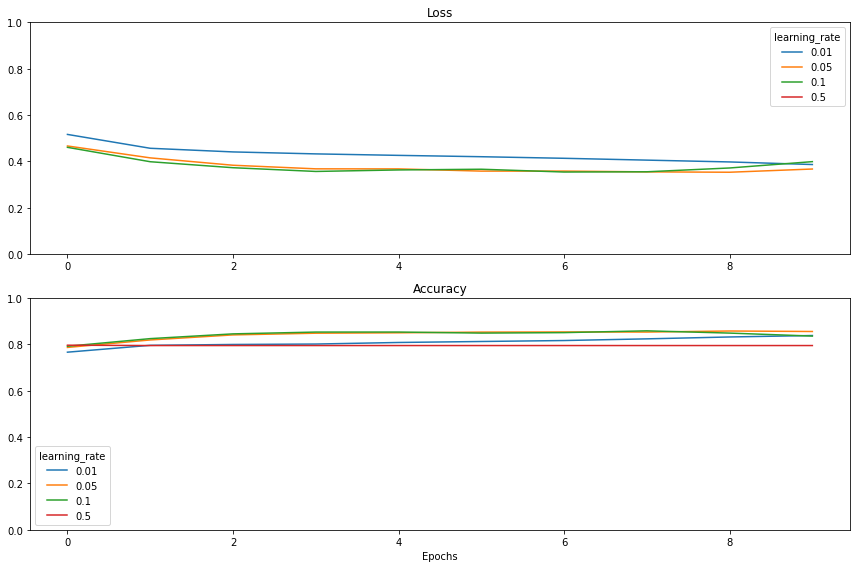

In [26]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [32]:
y_pred = ann.predict(X_test)

In [33]:
y_pred = (y_pred > 0.5)

In [34]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [35]:
ann.evaluate(X_test, y_test)

63/63 [==============================] - 0s 581us/step - loss: 0.3421 - accuracy: 0.8720


[0.34211182594299316, 0.871999979019165]

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[1542,   62],
       [ 194,  202]], dtype=int64)

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [39]:
clf.score(X_test,y_test)

0.874

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
X = pca.fit_transform(X)


In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [13]:
X.shape

(60000, 300)

In [14]:
clf.score(X_test,y_test)

0.9428333333333333